# Optimizer Example
MNIST ANN example showing comparison between *newer* optimizers that appeared *after* Adam.. This is a classification problem.

Richard Henry, 26-Jul-2024 

Adapted from mvsjober on Github.
https://github.com/CSCfi/machine-learning-scripts/blob/master/notebooks/keras-mnist-mlp.ipynb

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.17.0'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|ANN|Modern|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28)
batch_size = 128
num_epochs = 32

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core(mShape,mClass):
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=mShape),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(64, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(mClass, 
                                  activation="softmax"),
        ]
    )
    return model    
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model=model_core(myShap,myClas)
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:")
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    print("\n")
    print("Evaluate Model:")
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    print("Timing:")
    return myHis

### First Model, Adam

In [7]:
%%time
h0=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7506 - loss: 0.8016 - val_accuracy: 0.9535 - val_loss: 0.1564
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9328 - loss: 0.2289 - val_accuracy: 0.9690 - val_loss: 0.1081
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9515 - loss: 0.1643 - val_accuracy: 0.9738 - val_loss: 0.0853
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9588 - loss: 0.1379 - val_accuracy: 0.9743 - val_loss: 0.0804
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1172 - val_accuracy: 0.9758 - val_loss: 0.0753
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1029 - val_accuracy: 0.9783 - val_loss: 0.0702
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.0938 - val_accuracy: 0.9797 - val_loss: 0.0665
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0833 - v

### Second Model, Adam + Weight Decay

In [8]:
%%time
h1=model_build('adamw',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7585 - loss: 0.7855 - val_accuracy: 0.9523 - val_loss: 0.1572
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9335 - loss: 0.2260 - val_accuracy: 0.9682 - val_loss: 0.1071
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9513 - loss: 0.1644 - val_accuracy: 0.9723 - val_loss: 0.0886
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9600 - loss: 0.1366 - val_accuracy: 0.9747 - val_loss: 0.0818
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1124 - val_accuracy: 0.9758 - val_loss: 0.0807
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1033 - val_accuracy: 0.9782 - val_loss: 0.0755
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0940 - val_accuracy: 0.9795 - val_loss: 0.0702
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0832 - v

### Third Model, AdaFactor

In [9]:
%%time
h2=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3646 - loss: 1.8847 - val_accuracy: 0.8727 - val_loss: 0.5899
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7836 - loss: 0.7241 - val_accuracy: 0.9135 - val_loss: 0.3460
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8410 - loss: 0.5239 - val_accuracy: 0.9258 - val_loss: 0.2742
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8708 - loss: 0.4359 - val_accuracy: 0.9338 - val_loss: 0.2364
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8862 - loss: 0.3829 - val_accuracy: 0.9398 - val_loss: 0.2103
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8963 - loss: 0.3477 - val_accuracy: 0.9467 - val_loss: 0.1916
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9046 - loss: 0.3198 - val_accuracy: 0.9490 - val_loss: 0.1771
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9130 - loss: 0.2941 - v

### 4th Model, LION

In [10]:
%%time
h3=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7772 - loss: 0.7182 - val_accuracy: 0.9575 - val_loss: 0.1313
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9353 - loss: 0.2226 - val_accuracy: 0.9693 - val_loss: 0.1048
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9423 - loss: 0.2041 - val_accuracy: 0.9695 - val_loss: 0.1146
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9479 - loss: 0.1846 - val_accuracy: 0.9687 - val_loss: 0.1132
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9511 - loss: 0.1773 - val_accuracy: 0.9698 - val_loss: 0.1100
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9532 - loss: 0.1754 - val_accuracy: 0.9720 - val_loss: 0.1066
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9540 - loss: 0.1673 - val_accuracy: 0.9700 - val_loss: 0.1131
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9548 - loss: 0.1719 - v

### 5th Model, Adam with Nesterov Momentum

In [11]:
%%time
h4=model_build('nadam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7285 - loss: 0.8655 - val_accuracy: 0.9568 - val_loss: 0.1497
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9299 - loss: 0.2344 - val_accuracy: 0.9687 - val_loss: 0.1067
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9483 - loss: 0.1718 - val_accuracy: 0.9740 - val_loss: 0.0889
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9606 - loss: 0.1349 - val_accuracy: 0.9755 - val_loss: 0.0797
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9669 - loss: 0.1128 - val_accuracy: 0.9793 - val_loss: 0.0721
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0985 - val_accuracy: 0.9800 - val_loss: 0.0694
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0843 - val_accuracy: 0.9810 - val_loss: 0.0677
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0802 - v

### 6th Model, Follow the Regularized Leader

In [12]:
%%time
h5=model_build('ftrl',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1134 - loss: 2.3045 - val_accuracy: 0.1050 - val_loss: 2.3024
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1155 - loss: 2.3023 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1155 - loss: 2.3022 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1155 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1155 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1155 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1155 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1155 - loss: 2.3018 - v

### 7th Model, AdaMax

In [13]:
%%time
h6=model_build('adamax',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6605 - loss: 1.0888 - val_accuracy: 0.9348 - val_loss: 0.2335
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8962 - loss: 0.3562 - val_accuracy: 0.9510 - val_loss: 0.1744
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2725 - val_accuracy: 0.9602 - val_loss: 0.1426
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9341 - loss: 0.2291 - val_accuracy: 0.9643 - val_loss: 0.1249
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9417 - loss: 0.2002 - val_accuracy: 0.9670 - val_loss: 0.1116
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9478 - loss: 0.1807 - val_accuracy: 0.9700 - val_loss: 0.1020
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9523 - loss: 0.1622 - val_accuracy: 0.9713 - val_loss: 0.0965
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9566 - loss: 0.1485 - v

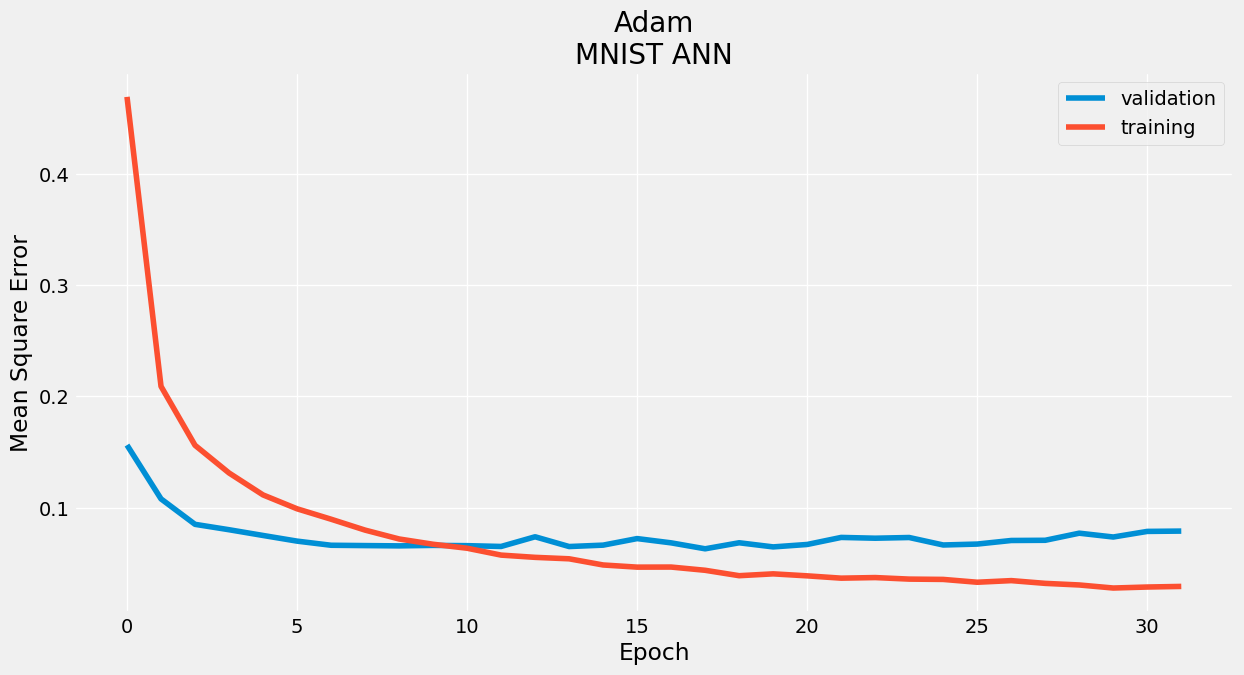

In [14]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_loss'])
plt.plot(h0.history['loss'])
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('Adam\nMNIST ANN')
plt.grid(color='white')
plt.show()

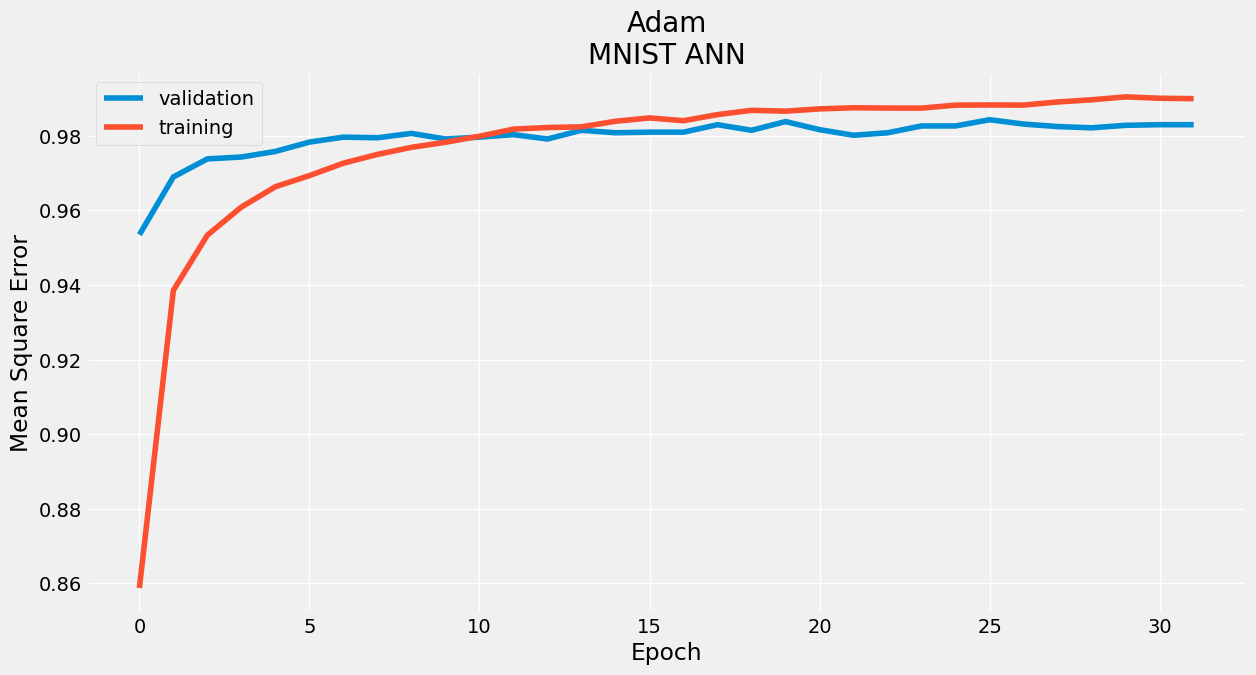

In [15]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h0.history['accuracy'])
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('Adam\nMNIST ANN')
plt.grid(color='white')
plt.show()

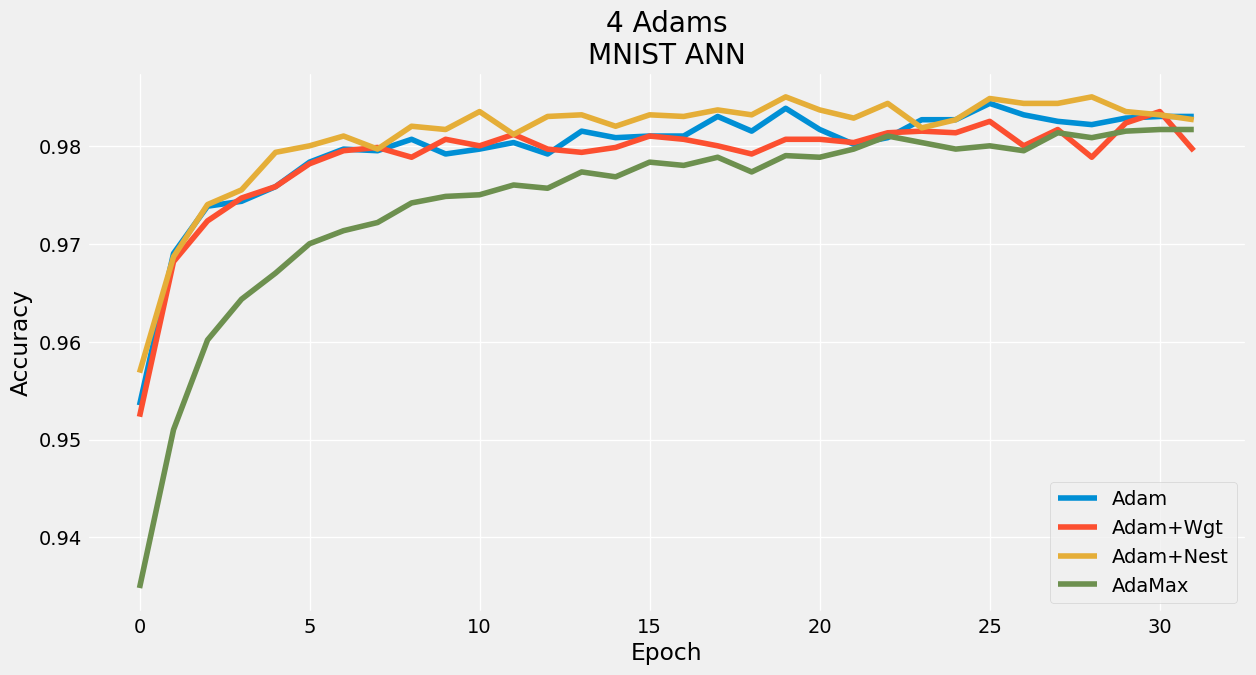

In [16]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h4.history['val_accuracy'])
plt.plot(h6.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','Adam+Wgt','Adam+Nest','AdaMax'])
plt.title('4 Adams\nMNIST ANN')
plt.grid(color='white')
plt.show()

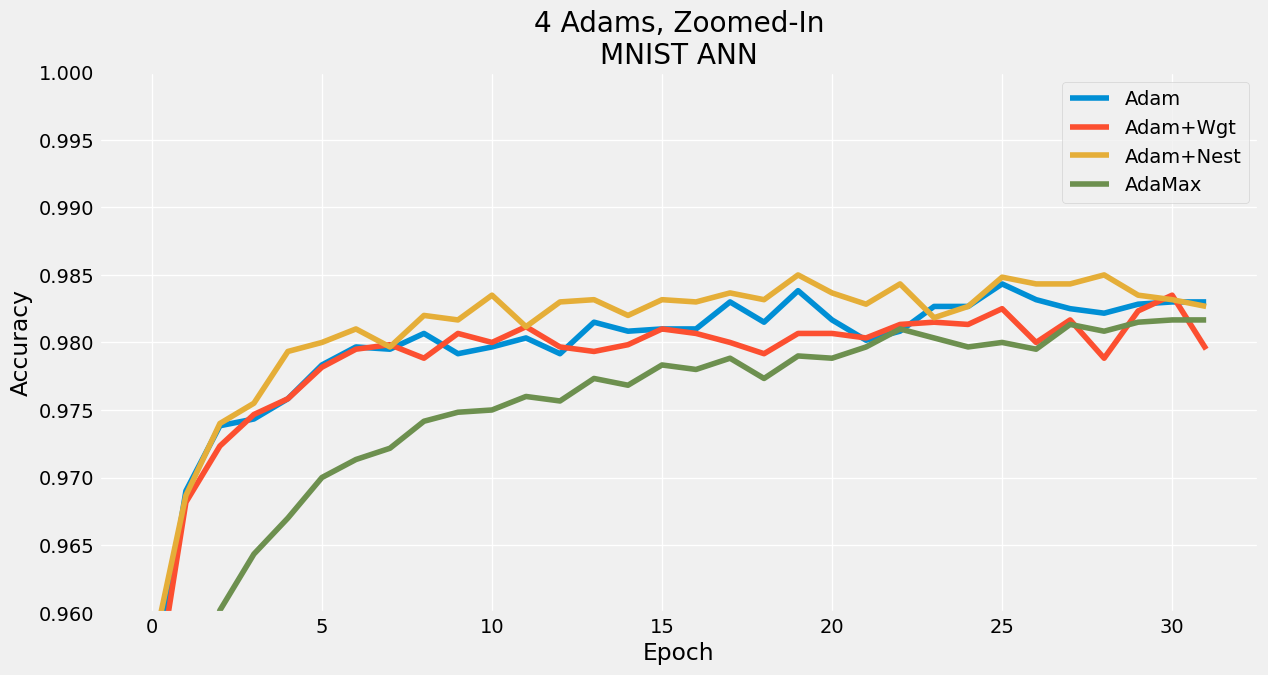

In [17]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h4.history['val_accuracy'])
plt.plot(h6.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','Adam+Wgt','Adam+Nest','AdaMax'])
plt.title('4 Adams, Zoomed-In\nMNIST ANN')
plt.ylim([0.96,1.00])
plt.grid(color='white')
plt.show()

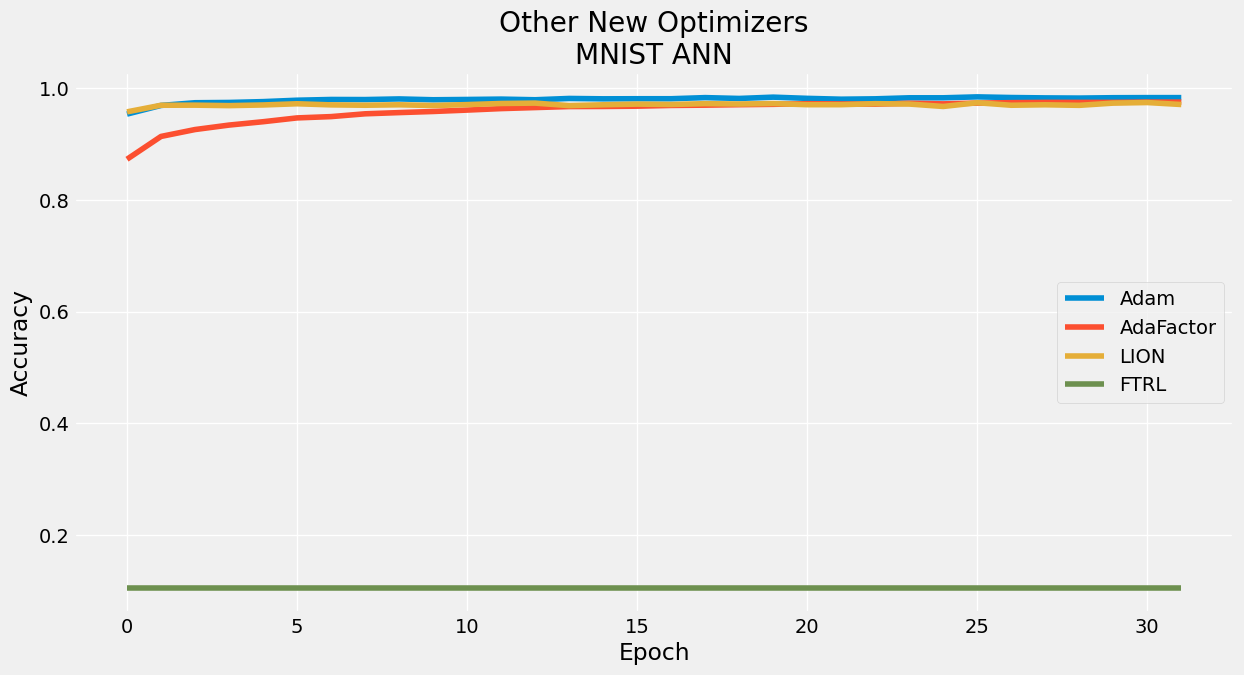

In [18]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.plot(h5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','AdaFactor','LION','FTRL'])
plt.title('Other New Optimizers\nMNIST ANN')
plt.grid(color='white')
plt.show()

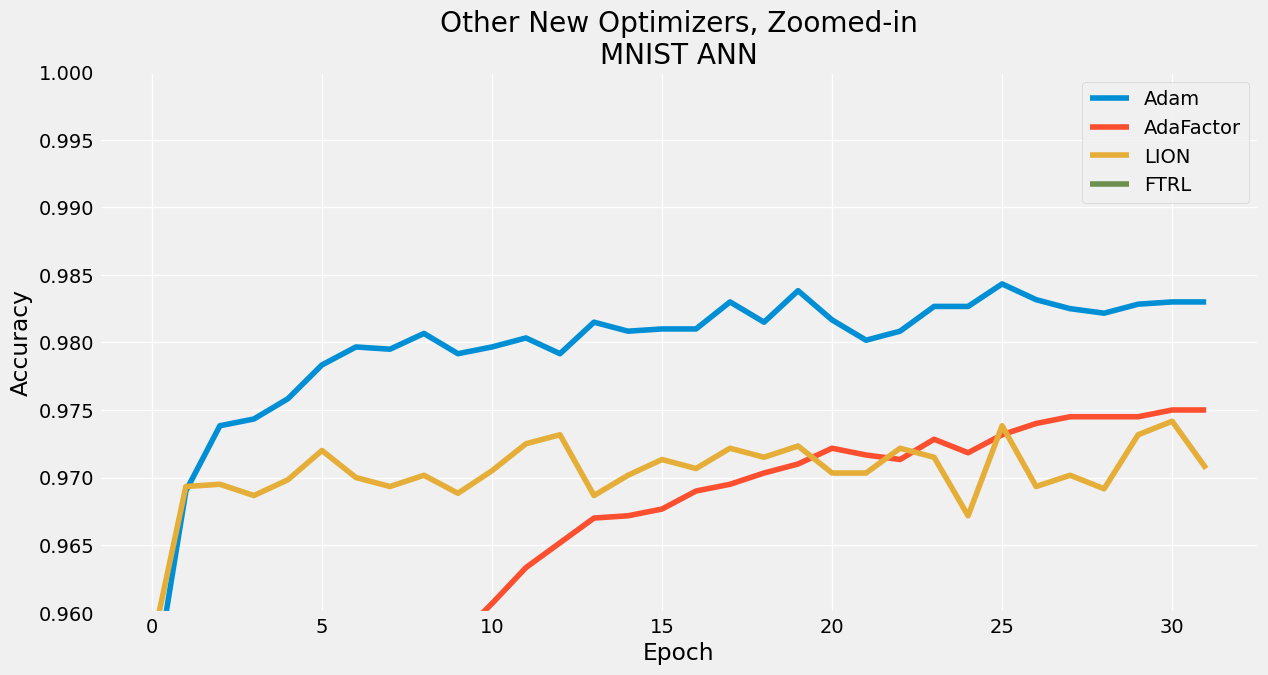

In [19]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.plot(h5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','AdaFactor','LION','FTRL'])
plt.title('Other New Optimizers, Zoomed-in\nMNIST ANN')
plt.ylim([0.96,1.00])
plt.grid(color='white')
plt.show()

In [20]:
m=model_core(input_shape,num_classes)
m.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)